In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/mohamedberrimi/oct-images-balanced-version")

Skipping, found downloaded files in ".\oct-images-balanced-version" (use force=True to force download)


In [ ]:
!pip install livelossplot

     ---------------------------------------- 16.5/16.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
from keras.applications import imagenet_utils
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
# from livelossplot import PlotLossesKerasTF
# import tensorflow_addons as tfa

tfds.disable_progress_bar()

In [ ]:
tf.test.is_gpu_available(
                 cuda_only = True, min_cuda_compute_capability = (3,1) )

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/OCT_Balanced_Version/Balanced',
    shuffle = True,
    image_size = (224, 224),
    batch_size = 32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test/test',
    shuffle = False,
    image_size = (224, 224),
    batch_size = 32,
)

Found 32064 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [1]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d mohamedberrimi/oct-images-balanced-version
import zipfile
zipref=zipfile.ZipFile("/content/oct-images-balanced-version.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/oct-images-balanced-version.zip

100% 4.15G/4.15G [02:55<00:00, 30.1MB/s]
100% 4.15G/4.15G [02:55<00:00, 25.4MB/s]


In [4]:
from tensorflow.keras.utils import normalize
import os
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys
import random
import os
from keras.preprocessing import image
import tensorflow as tf 
import keras 
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
import tensorflow as tf
np.set_printoptions(threshold=sys.maxsize)

In [2]:
import tensorflow as tf
classify_model = tf.keras.models.load_model('/content/classify_model4 (1) (1).h5')

In [6]:
def data_partition(data, train_split = 0.9, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds = len(data)
    if shuffle:
        data = data.shuffle(shuffle_size, seed = 23)

    train_size = int(train_split * ds)
    val_size = int(val_split * ds)

    train_data = data.take(train_size)
    val_data = data.skip(train_size)

    return train_data, val_data

In [7]:
train_data, val_data = data_partition(dataset)
print(f"{len(train_data)},{len(val_data)}")

901,101


In [ ]:
!git lfs install
!git clone https://huggingface.co/keras-io/mobile-vit-xxs

Git LFS initialized.


Cloning into 'mobile-vit-xxs'...
Filtering content: 100% (2/2)
Filtering content: 100% (2/2), 4.43 MiB | 868.00 KiB/s, done.


In [ ]:
from tensorflow import keras
model = keras.models.load_model('mobile-vit-xxs')

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_84 (Conv2D)             (None, 128, 128, 16  448         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                            

 add_64 (Add)                   (None, 64, 64, 24)   0           ['batch_normalization_71[0][0]', 
                                                                  'batch_normalization_68[0][0]'] 
                                                                                                  
 conv2d_91 (Conv2D)             (None, 64, 64, 48)   1152        ['add_64[0][0]']                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 64, 64, 48)  192         ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.silu_48 (TFOpLambda)     (None, 64, 64, 48)   0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 depthwise

                                                                                                  
 add_68 (Add)                   (None, 4, 256, 64)   0           ['multi_head_attention_28[0][0]',
                                                                  'add_67[0][0]']                 
                                                                                                  
 layer_normalization_57 (LayerN  (None, 4, 256, 64)  128         ['add_68[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 dense_59 (Dense)               (None, 4, 256, 128)  8320        ['layer_normalization_57[0][0]'] 
                                                                                                  
 dropout_56 (Dropout)           (None, 4, 256, 128)  0           ['dense_59[0][0]']               
          

 HeadAttention)                                                   'layer_normalization_60[0][0]'] 
                                                                                                  
 add_72 (Add)                   (None, 4, 64, 80)    0           ['multi_head_attention_30[0][0]',
                                                                  'add_71[0][0]']                 
                                                                                                  
 layer_normalization_61 (LayerN  (None, 4, 64, 80)   160         ['add_72[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 dense_63 (Dense)               (None, 4, 64, 160)   12960       ['layer_normalization_61[0][0]'] 
                                                                                                  
 dropout_6

                                                                                                  
 depthwise_conv2d_27 (Depthwise  (None, 8, 8, 160)   1440        ['zero_padding2d_15[0][0]']      
 Conv2D)                                                                                          
                                                                                                  
 batch_normalization_82 (BatchN  (None, 8, 8, 160)   640         ['depthwise_conv2d_27[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 tf.nn.silu_55 (TFOpLambda)     (None, 8, 8, 160)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 conv2d_106 (Conv2D)            (None, 8, 8, 80)     12800       ['tf.nn.silu_55[0][0]']          
          

                                                                                                  
 dropout_71 (Dropout)           (None, 4, 16, 96)    0           ['dense_74[0][0]']               
                                                                                                  
 add_83 (Add)                   (None, 4, 16, 96)    0           ['dropout_71[0][0]',             
                                                                  'add_82[0][0]']                 
                                                                                                  
 reshape_23 (Reshape)           (None, 8, 8, 96)     0           ['add_83[0][0]']                 
                                                                                                  
 conv2d_109 (Conv2D)            (None, 8, 8, 80)     7760        ['reshape_23[0][0]']             
                                                                                                  
 concatena

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
learning_rate = 0.0003
label_smoothing_factor = 0.1
epochs = 30

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
checkpoint_filepath = "C:/Users/GPUSW1/Desktop/sample_data/checkpoint"
checkpoint = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr=0.00001, mode = 'auto')
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr ]

In [ ]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

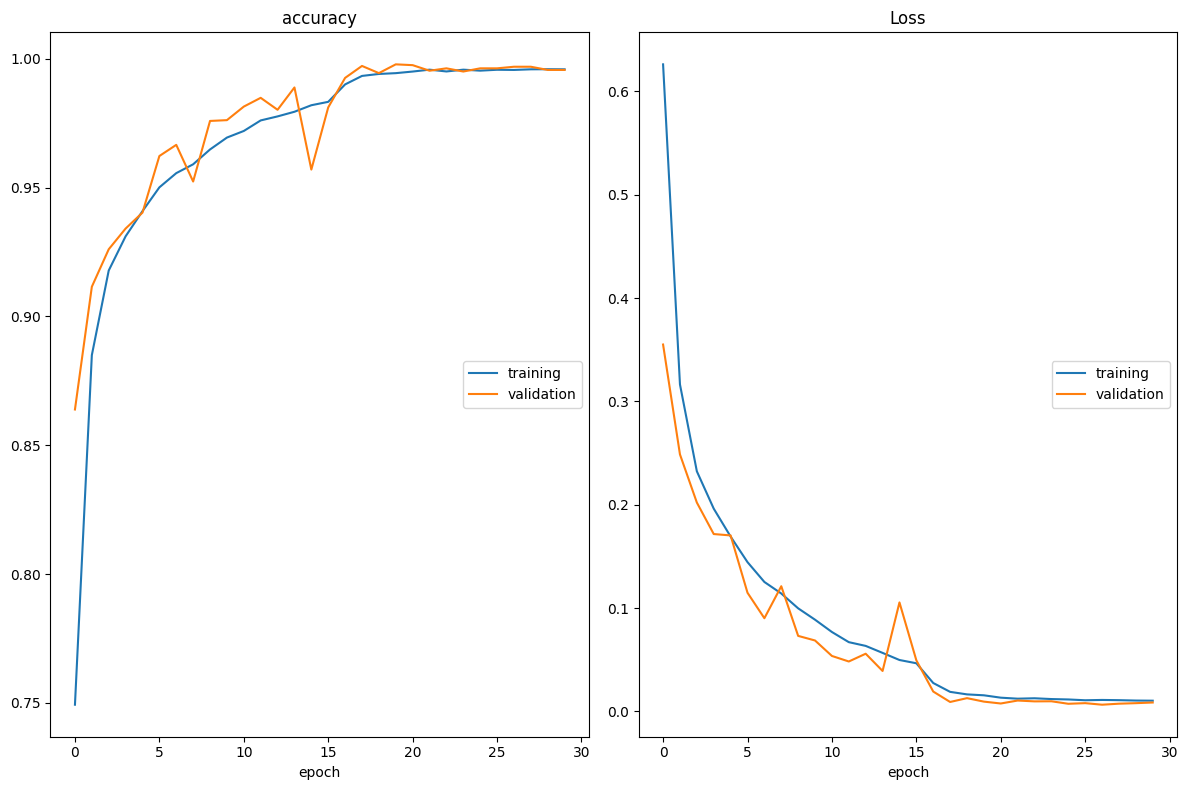

accuracy
	training         	 (min:    0.749, max:    0.996, cur:    0.996)
	validation       	 (min:    0.864, max:    0.998, cur:    0.996)
Loss
	training         	 (min:    0.010, max:    0.626, cur:    0.010)
	validation       	 (min:    0.006, max:    0.355, cur:    0.009)
901/901 [==============================] - 204s 211ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.0086 - val_accuracy: 0.9957 - lr: 1.0000e-05


In [ ]:
model_1 = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    verbose = 1,
                    callbacks = callbacks,
                    )

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

31/31 [==============================] - 3s 80ms/step - loss: 0.0469 - accuracy: 0.9886


In [ ]:
model.save('oct_classifynew10.h5')

In [ ]:
model_json = model.to_json()
with open('modelnew10.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']

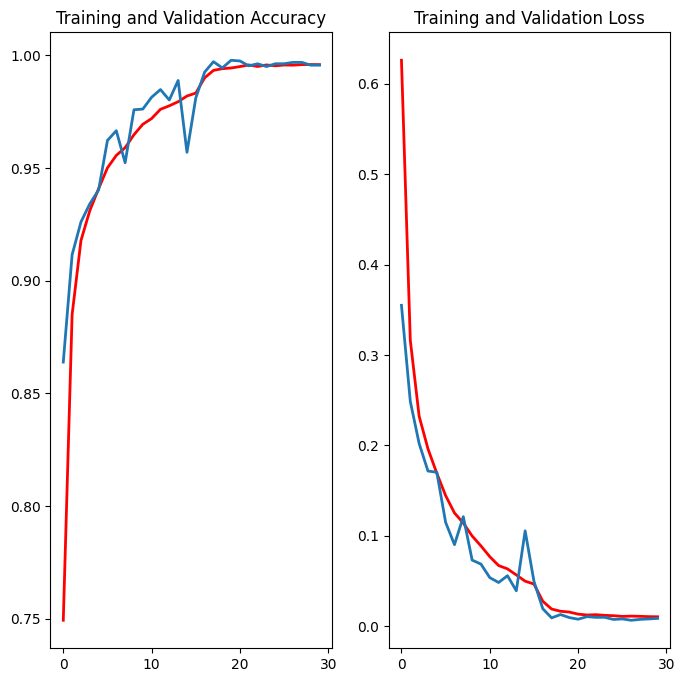

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
EPOCHS = 30
plt.plot(range(EPOCHS), accuracy, color='red',linewidth=2, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy,linewidth=2, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss,color='red',linewidth=2, label='Training Loss')
plt.plot(range(EPOCHS), val_loss,linewidth=2, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

['CNV', 'DME', 'DRUSEN', 'NORMAL']
1/1 [==============================] - 0s 40ms/step


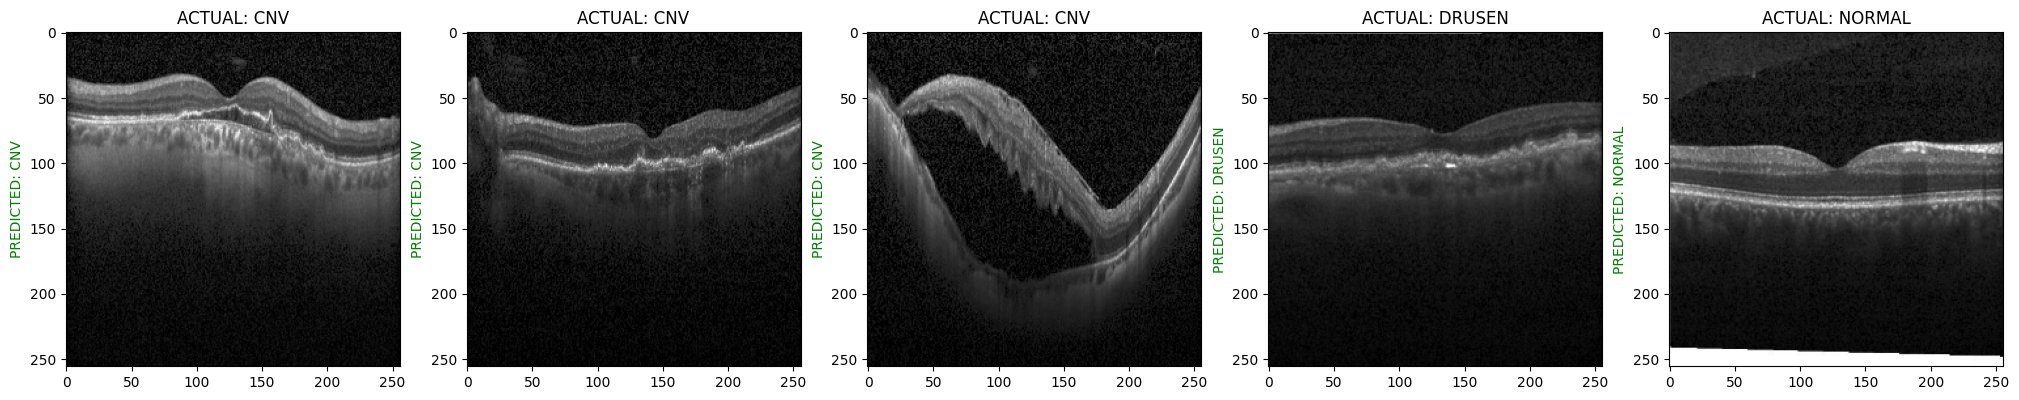

In [ ]:
plt.figure(figsize = (25, 25))
CLASSES = dataset.class_names
print(CLASSES)
import numpy as np
for images, labels in train_data.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
    
        plt.imshow(images[i].numpy().astype('uint8'))
        pred = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(pred[0])
        if(CLASSES[labels[i]] == CLASSES[np.argmax(score)]):
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'green'})
        else:
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'red'})

31/31 [==============================] - 77s 2s/step


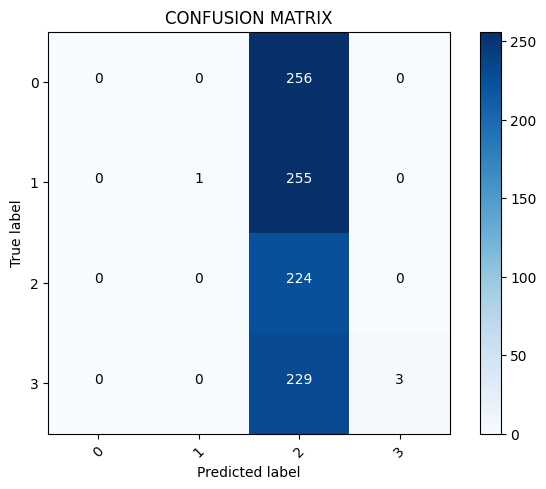

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

#making a confusion matrixes
def plot_cm(cm, classes, normalize = False, title = 'CONFUSION MATRIX', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = classify_model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)

y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())

# y_true = np.argmax(dataset)
# print(y_true)

confusion_mtx = confusion_matrix(y_val, y_pred_class) 

plot_cm(confusion_mtx, classes = range(4))

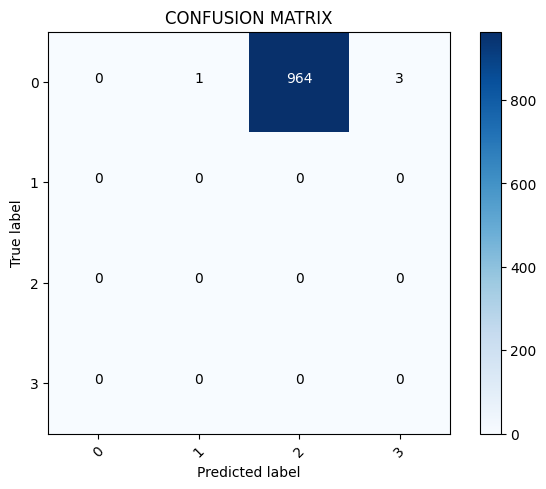

In [9]:
y_pred_class = np.argmax(y_pred, axis = 1)

y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(int(np.argmax(i)))
        #print(int(np.argmax(i)))
        #print(label)
# y_true = np.argmax(dataset)
# print(y_true)

confusion_mtx = confusion_matrix(y_val, y_pred_class) 

plot_cm(confusion_mtx, classes = range(4))

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)
y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())
    
    
f1_score(y_val, y_pred_class, average = 'macro')    
f1_score(y_val, y_pred_class, average = None)    

31/31 [==============================] - 2s 72ms/step


array([0.9516129 , 0.9010101 , 0.90870488, 0.97890295])

In [ ]:
import graphviz
import pydot_ng
import pydotplus

In [ ]:
plot_model(model,     
                          to_file="model.png",
)

In [ ]:
!pip install pydot-ng
!pip install graphviz
!pip install pydotplus


In [ ]:
!pip install visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(model)